<a href="https://colab.research.google.com/github/Sreenishetty/Car_class_multi-classification/blob/main/Car_price_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
data = pd.read_csv('cars_class.csv')
data.head()

,ID,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
0,1,88,39,70,166,66,7,148,44,19,134,167,332,143,69,5,13,193,201,0
1,2,85,35,64,129,57,6,116,57,17,125,138,200,123,65,1,23,196,203,3
2,3,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,3
3,4,102,54,98,177,56,10,219,31,25,171,219,706,223,72,5,17,186,196,1
4,5,87,39,74,152,58,6,151,44,19,136,174,337,140,70,1,33,187,196,2


In [ ]:
data.shape

(719, 20)

In [ ]:
data['Class'].unique()

array([0, 3, 1, 2])

In [ ]:
data.isnull().sum()

ID              0
Comp            0
Circ            0
D.Circ          0
Rad.Ra          0
Pr.Axis.Ra      0
Max.L.Ra        0
Scat.Ra         0
Elong           0
Pr.Axis.Rect    0
Max.L.Rect      0
Sc.Var.Maxis    0
Sc.Var.maxis    0
Ra.Gyr          0
Skew.Maxis      0
Skew.maxis      0
Kurt.maxis      0
Kurt.Maxis      0
Holl.Ra         0
Class           0
dtype: int64

In [ ]:
data['Class'].value_counts()

0    189
1    180
3    177
2    173
Name: Class, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   ID            719 non-null    int64
 1   Comp          719 non-null    int64
 2   Circ          719 non-null    int64
 3   D.Circ        719 non-null    int64
 4   Rad.Ra        719 non-null    int64
 5   Pr.Axis.Ra    719 non-null    int64
 6   Max.L.Ra      719 non-null    int64
 7   Scat.Ra       719 non-null    int64
 8   Elong         719 non-null    int64
 9   Pr.Axis.Rect  719 non-null    int64
 10  Max.L.Rect    719 non-null    int64
 11  Sc.Var.Maxis  719 non-null    int64
 12  Sc.Var.maxis  719 non-null    int64
 13  Ra.Gyr        719 non-null    int64
 14  Skew.Maxis    719 non-null    int64
 15  Skew.maxis    719 non-null    int64
 16  Kurt.maxis    719 non-null    int64
 17  Kurt.Maxis    719 non-null    int64
 18  Holl.Ra       719 non-null    int64
 19  Class         719 non-null   

In [ ]:
data.describe()

,ID,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
count,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000
mean,360.000000,93.435327,44.851182,81.723227,168.579972,61.847010,8.625869,168.137691,41.075104,20.531293,148.030598,188.168289,436.215577,174.726008,72.682893,6.343533,12.394993,188.798331,195.407510,1.470097
std,207.701709,8.111406,6.150286,15.528208,33.809172,8.259136,4.916908,32.937591,7.764459,2.560969,14.560092,31.235395,174.964977,32.149568,7.542055,4.856169,8.742511,6.048522,7.235166,1.126477
min,1.000000,73.000000,33.000000,40.000000,105.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000,0.000000
25%,180.500000,87.000000,40.000000,70.000000,141.000000,57.000000,6.000000,146.000000,33.000000,19.000000,137.000000,167.000000,317.000000,149.000000,68.000000,2.000000,5.500000,184.000000,190.000000,0.000000
50%,360.000000,93.000000,44.000000,79.000000,166.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.000000,362.000000,174.000000,72.000000,6.000000,11.000000,188.000000,196.000000,1.000000
75%,539.500000,99.000000,49.000000,96.000000,194.500000,65.000000,10.000000,197.500000,46.000000,23.000000,159.000000,216.000000,584.500000,198.000000,76.000000,9.000000,18.000000,193.000000,201.000000,2.000000
max,719.000000,119.000000,59.000000,110.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,262.000000,135.000000,22.000000,41.000000,204.000000,211.000000,3.000000


In [ ]:
data.describe().round(2).style.background_gradient()

,ID,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
count,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000
mean,360.000000,93.440000,44.850000,81.720000,168.580000,61.850000,8.630000,168.140000,41.080000,20.530000,148.030000,188.170000,436.220000,174.730000,72.680000,6.340000,12.390000,188.800000,195.410000,1.470000
std,207.700000,8.110000,6.150000,15.530000,33.810000,8.260000,4.920000,32.940000,7.760000,2.560000,14.560000,31.240000,174.960000,32.150000,7.540000,4.860000,8.740000,6.050000,7.240000,1.130000
min,1.000000,73.000000,33.000000,40.000000,105.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000,0.000000
25%,180.500000,87.000000,40.000000,70.000000,141.000000,57.000000,6.000000,146.000000,33.000000,19.000000,137.000000,167.000000,317.000000,149.000000,68.000000,2.000000,5.500000,184.000000,190.000000,0.000000
50%,360.000000,93.000000,44.000000,79.000000,166.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.000000,362.000000,174.000000,72.000000,6.000000,11.000000,188.000000,196.000000,1.000000
75%,539.500000,99.000000,49.000000,96.000000,194.500000,65.000000,10.000000,197.500000,46.000000,23.000000,159.000000,216.000000,584.500000,198.000000,76.000000,9.000000,18.000000,193.000000,201.000000,2.000000
max,719.000000,119.000000,59.000000,110.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,262.000000,135.000000,22.000000,41.000000,204.000000,211.000000,3.000000


In [ ]:

data.duplicated().sum()

0

In [ ]:
X = data.iloc[:,0:-1]
y = data.iloc[:,-1]

In [ ]:
X.head()

,ID,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra
0,1,88,39,70,166,66,7,148,44,19,134,167,332,143,69,5,13,193,201
1,2,85,35,64,129,57,6,116,57,17,125,138,200,123,65,1,23,196,203
2,3,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199
3,4,102,54,98,177,56,10,219,31,25,171,219,706,223,72,5,17,186,196
4,5,87,39,74,152,58,6,151,44,19,136,174,337,140,70,1,33,187,196


In [ ]:
X.shape

(719, 19)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=True )

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
SS = StandardScaler()

In [ ]:
X_train = SS.fit_transform(X_train)

In [ ]:
import time
from sklearn.linear_model import LogisticRegression
lr =  LogisticRegression()

lr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.8069565217391305
0.3055555555555556


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
from sklearn.metrics import f1_score
y_pred = lr.predict(X_test)
print(f1_score(y_test, y_pred,average='micro'))

0.3055555555555556


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


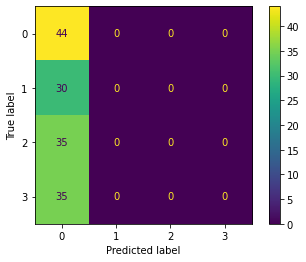

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lr, X_test, y_test)

In [ ]:
# SVC

from sklearn.svm import SVC
svc =  SVC()

svc.fit(X_train, y_train)

SVC()

In [ ]:
print(svc.score(X_train, y_train))
print(svc.score(X_test, y_test))

0.8417391304347827
0.3055555555555556


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
from sklearn.metrics import f1_score
y_pred = svc.predict(X_test)
print(f1_score(y_test, y_pred,average='macro'))

0.11702127659574468


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


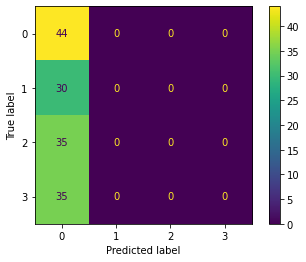

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svc, X_test, y_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn =  KNeighborsClassifier()

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

0.8173913043478261
0.3055555555555556


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
from sklearn.metrics import f1_score
y_pred = knn.predict(X_test)
print(f1_score(y_test, y_pred,average='micro'))


0.3055555555555556


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


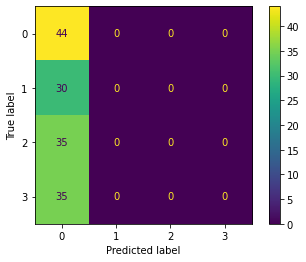

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test, y_test)